# MNIST 손글씨 분류 - 신경망

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
seed=2022
np.random.seed(seed)
tf.random.set_seed(seed)

- 데이터 전처리


In [ ]:
from tensorflow.keras.datasets import mnist
(X_train, y_train), (X_test,y_test) = mnist.load_data()
X_train.shape, y_train.shape,X_test.shape,y_test.shape

11501568/11490434 [==============================] - 0s 0us/step


((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

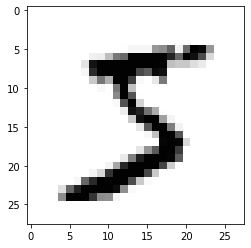

In [ ]:
plt.imshow(X_train[0],cmap='Greys');#세미콜론 있으면 무슨 설명 나오는 게 없어짐

In [ ]:
import sys
for row in X_train[0]:
    for x in row:
        sys.stdout.write(f'{x:3d}')
    sys.stdout.write('\n')

  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  3 18 18 18126136175 26166255247127  0  0  0  0
  0  0  0  0  0  0  0  0 30 36 94154170253253253253253225172253242195 64  0  0  0  0
  0  0  0  0  0  0  0 49238253253253253253253253253251 93 82 82 56 39  0  0  0  0  0
  0  0  0  0  0  0  0 18219253253253253253198182247241  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0 80156107253253205 11  0 43154  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0 14  1154253 90  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0139253190  2  0  0  0  0  0  0  

In [ ]:
#X_train, X_test 정규화 (0~1)
X_train = X_train / 255.
X_test = X_test / 255.

In [ ]:
#이미지 차원 변경:2차원->1차원. (CNN=2차원을 3차원으로 올려야.)
X_train = X_train.reshape(60000,-1)
X_test=X_test.reshape(-1,784) #28 x 28 = 784
X_train.shape, X_test.shape

((60000, 784), (10000, 784))

In [ ]:
#y값 분포
np.unique(y_train, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]))

In [ ]:
#원핫인코딩
from tensorflow.keras.utils import to_categorical
Y_train = to_categorical(y_train)
Y_test=to_categorical(y_test)
Y_train.shape,Y_test.shape

((60000, 10), (10000, 10))

- 모델 정의/설정/학습/평가

In [ ]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [ ]:
model1=Sequential([
                  Dense(1000,input_dim=784,activation='relu'),
                  Dense(256,activation='relu'),
                  Dense(48,activation='relu'),
                  Dense(10,activation='softmax')
])
model1.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1000)              785000    
                                                                 
 dense_1 (Dense)             (None, 256)               256256    
                                                                 
 dense_2 (Dense)             (None, 48)                12336     
                                                                 
 dense_3 (Dense)             (None, 10)                490       
                                                                 
Total params: 1,054,082
Trainable params: 1,054,082
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model1.compile('adam','categorical_crossentropy',['accuracy'])

In [ ]:
mc1=ModelCheckpoint('mnist_best1.h5',verbose=1,save_best_only=True)
es1=EarlyStopping(patience=10)
hist1=model1.fit(X_train,Y_train,validation_split=0.2,
                 epochs=100,batch_size=200,verbose=0,
                 callbacks=[mc1,es1])


Epoch 1: val_loss improved from inf to 0.12565, saving model to mnist_best1.h5

Epoch 2: val_loss improved from 0.12565 to 0.09835, saving model to mnist_best1.h5

Epoch 3: val_loss improved from 0.09835 to 0.08339, saving model to mnist_best1.h5

Epoch 4: val_loss did not improve from 0.08339

Epoch 5: val_loss did not improve from 0.08339

Epoch 6: val_loss did not improve from 0.08339

Epoch 7: val_loss did not improve from 0.08339

Epoch 8: val_loss did not improve from 0.08339

Epoch 9: val_loss did not improve from 0.08339

Epoch 10: val_loss did not improve from 0.08339

Epoch 11: val_loss did not improve from 0.08339

Epoch 12: val_loss did not improve from 0.08339

Epoch 13: val_loss did not improve from 0.08339


In [ ]:
best_model1=load_model('mnist_best1.h5')
best_model1.evaluate(X_test,Y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.0846 - accuracy: 0.9743


[0.08464588224887848, 0.9743000268936157]

In [ ]:
model2=Sequential([
                  Dense(1000,input_dim=784,activation='relu'),
                  Dropout(0.25),
                  Dense(256,activation='relu'),
                  Dropout(0.25),
                  Dense(48,activation='relu'),
                  Dense(10,activation='softmax')
])
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 1000)              785000    
                                                                 
 dropout (Dropout)           (None, 1000)              0         
                                                                 
 dense_5 (Dense)             (None, 256)               256256    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_6 (Dense)             (None, 48)                12336     
                                                                 
 dense_7 (Dense)             (None, 10)                490       
                                                                 
Total params: 1,054,082
Trainable params: 1,054,082
No

In [ ]:
model2.compile('adam','categorical_crossentropy',['accuracy'])

In [ ]:
mc2=ModelCheckpoint('mnist_best2.h5',verbose=1,save_best_only=True)
es2=EarlyStopping(patience=10)
hist2=model2.fit(X_train,Y_train,validation_split=0.2,
                 epochs=100,batch_size=200,verbose=0,
                 callbacks=[mc2,es2])


Epoch 1: val_loss improved from inf to 0.13474, saving model to mnist_best2.h5

Epoch 2: val_loss improved from 0.13474 to 0.09943, saving model to mnist_best2.h5

Epoch 3: val_loss improved from 0.09943 to 0.08306, saving model to mnist_best2.h5

Epoch 4: val_loss improved from 0.08306 to 0.08201, saving model to mnist_best2.h5

Epoch 5: val_loss did not improve from 0.08201

Epoch 6: val_loss improved from 0.08201 to 0.07769, saving model to mnist_best2.h5

Epoch 7: val_loss improved from 0.07769 to 0.07402, saving model to mnist_best2.h5

Epoch 8: val_loss improved from 0.07402 to 0.07171, saving model to mnist_best2.h5

Epoch 9: val_loss did not improve from 0.07171

Epoch 10: val_loss did not improve from 0.07171

Epoch 11: val_loss did not improve from 0.07171

Epoch 12: val_loss did not improve from 0.07171

Epoch 13: val_loss did not improve from 0.07171

Epoch 14: val_loss did not improve from 0.07171

Epoch 15: val_loss did not improve from 0.07171

Epoch 16: val_loss did no

In [ ]:
best_model1=load_model('mnist_best2.h5')
best_model1.evaluate(X_test,Y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.0648 - accuracy: 0.9832


[0.06479279696941376, 0.9832000136375427]

- 훈련과정 시각화 

In [ ]:
y_acc1=hist1.history['accuracy']
y_vloss1=hist1.history['val_loss']
xs1=np.arange(1, len(y_acc1)+1)
y_acc2=hist2.history['accuracy']
y_vloss2=hist2.history['val_loss']
xs2=np.arange(1, len(y_acc2)+1)

Text(0.5, 0, 'Epoch')

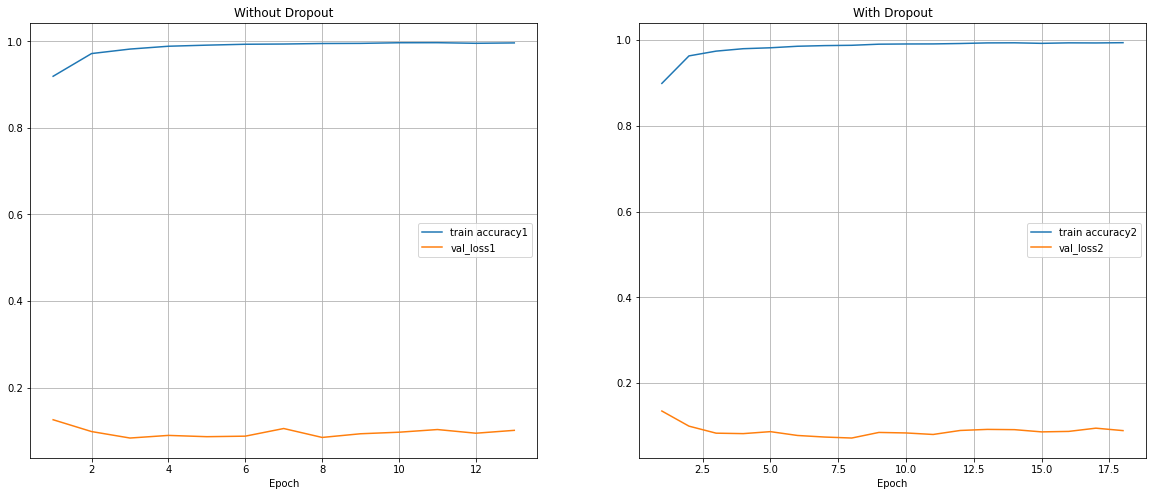

In [ ]:
plt.figure(figsize=(20,8))
plt.subplot(121)
plt.plot(xs1,y_acc1,label='train accuracy1')
plt.plot(xs1,y_vloss1,label='val_loss1')
plt.legend(),
plt.title('Without Dropout')
plt.grid(),
plt.xlabel('Epoch')
plt.subplot(122)

plt.plot(xs2,y_acc2,label='train accuracy2')
plt.plot(xs2,y_vloss2,label='val_loss2')
plt.legend(),
plt.title('With Dropout')
plt.grid(),
plt.xlabel('Epoch')
#대체로 val-loss는 한번 고개를 드는데 
#얘는 아직 안 든 거 보면 학습 더 많이 하면 더 낮아질 여지가 있다. 